<a href="https://colab.research.google.com/github/olgOk/Hackathon2020/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.utils import shuffle
import time

In [ ]:
!pip install qiskit-aqua==0.7
from qiskit.ml.datasets import ad_hoc_data, breast_cancer
from qiskit.aqua import aqua_globals
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.aqua.algorithms import SklearnSVM

In [ ]:
def convertData(training_size, test_size, n, gap, plot_data): 
  class_labels = [r'A', r'B']
  data = pd.read_csv('/content/dataset_competition_IBM.csv')
  data = shuffle(data.values, random_state=0)
  # print(data[:,data.shape[1]-1])
  sample_train, sample_test, label_train, label_test = \
      train_test_split(data[:,0:data.shape[1]-1], data[:,data.shape[1]-1], test_size=0.3, random_state=12)
  print(label_train)
  # Now we standardize for gaussian around 0 with unit variance
  std_scale = StandardScaler().fit(sample_train)
  sample_train = std_scale.transform(sample_train)
  sample_test = std_scale.transform(sample_test)

  # Now reduce number of features to number of qubits
  pca = PCA(n_components=n).fit(sample_train)
  sample_train = pca.transform(sample_train)
  sample_test = pca.transform(sample_test)

  # Scale to the range (-1,+1)
  samples = np.append(sample_train, sample_test, axis=0)
  minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
  sample_train = minmax_scale.transform(sample_train)
  sample_test = minmax_scale.transform(sample_test)

  # Pick training size number of samples from each distro
  training_input = {key: (sample_train[label_train == k, :])[:training_size]
                    for k, key in enumerate(class_labels)}
  test_input = {key: (sample_test[label_test == k, :])[:test_size]
                for k, key in enumerate(class_labels)}

  if plot_data:
      try:
          import matplotlib.pyplot as plt
      except ImportError:
          raise NameError('Matplotlib not installed. Please install it before plotting')
      for k in range(0, 2):
          plt.scatter(sample_train[label_train == k, 0][:training_size],
                      sample_train[label_train == k, 1][:training_size])

      plt.title("PCA dim. reduced dataset")
      plt.show()

  return sample_train, training_input, test_input, class_labels

[1. 1. 0. ... 1. 1. 0.]


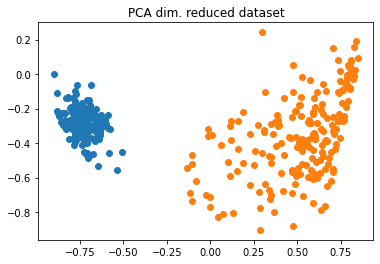

In [ ]:
sample_Total, training_input, test_input, class_labels = convertData(training_size=200, test_size=30, n = 2, gap = 0.3, plot_data =True)

In [ ]:
result = SklearnSVM(training_input, test_input).run()

print("testing success ratio: ", result['testing_accuracy'])

testing success ratio:  1.0
